# Install libs

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.5 MB/s eta 0:00:00


backup original pictures before accessing

In [2]:
# !cp -r "/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures" "/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures_backup"

# Create mapping between country names and filenames

### Nationality to country name map

In [3]:
european_countries = {
    'Albanian': 'Albania',
    'Andorran': 'Andorra',
    'Armenian': 'Armenia',
    'Austrian': 'Austria',
    'Azerbaijani': 'Azerbaijan',
    'Belarusian': 'Belarus',
    'Belgian': 'Belgium',
    'Bosnian': 'Bosnia and Herzegovina',
    'Bulgarian': 'Bulgaria',
    'Croatian': 'Croatia',
    'Cypriot': 'Cyprus',
    'Czech': 'Czech Republic',
    'Danish': 'Denmark',
    'Estonian': 'Estonia',
    'Finnish': 'Finland',
    'French': 'France',
    'Georgian': 'Georgia',
    'German': 'Germany',
    'Greek': 'Greece',
    'Hungarian': 'Hungary',
    'Icelandic': 'Iceland',
    'Irish': 'Ireland',
    'Italian': 'Italy',
    'Kazakhstani': 'Kazakhstan',
    'Kosovan': 'Kosovo',
    'Latvian': 'Latvia',
    'Liechtensteiner': 'Liechtenstein',
    'Lithuanian': 'Lithuania',
    'Luxembourger': 'Luxembourg',
    'Macedonian': 'North Macedonia',
    'Maltese': 'Malta',
    'Moldovan': 'Moldova',
    'Monégasque': 'Monaco',
    'Montenegrin': 'Montenegro',
    'Dutch': 'Netherlands',
    'Norwegian': 'Norway',
    'Polish': 'Poland',
    'Portuguese': 'Portugal',
    'Romanian': 'Romania',
    'Russian': 'Russia',
    'San Marinese': 'San Marino',
    'Serbian': 'Serbia',
    'Slovak': 'Slovakia',
    'Slovenian': 'Slovenia',
    'Spanish': 'Spain',
    'Swedish': 'Sweden',
    'Swiss': 'Switzerland',
    'Ukrainian': 'Ukraine',
    'British': 'United Kingdom',
    'Vatican': 'Vatican City'
}


### Map country names to filenames (defaults to last image filename)

In [4]:
import os
import re
import pandas as pd

def find_country_name(filename):
  words = filename.split('-')
  for word in words:
    if word.capitalize() in european_countries:
      return european_countries[word.capitalize()]
  return None


def map_images_to_countries(directory):
    # Get list of image files in directory
    files = os.listdir(directory)
    country_to_image = []
    batch_count = 4
    for index, file in enumerate(files):
        # Look for nationality in the filename string using regex
        country_name = find_country_name(file)
        country_to_image.append([country_name,index % batch_count, os.path.join(directory, file)])
    return country_to_image


directory = "/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures"

country_to_filename_df = pd.DataFrame(map_images_to_countries(directory), columns = ["countryName", "batch_index", "filename"])
country_to_filename_df

countryName  batch_index  \
0       Austria            0   
1       Austria            1   
2       Austria            2   
3       Austria            3   
4       Belgium            0   
..          ...          ...   
211       Spain            3   
212      Sweden            0   
213      Sweden            1   
214      Sweden            2   
215      Sweden            3   

                                              filename  
0    /content/drive/MyDrive/AI/deliberate_model/eur...  
1    /content/drive/MyDrive/AI/deliberate_model/eur...  
2    /content/drive/MyDrive/AI/deliberate_model/eur...  
3    /content/drive/MyDrive/AI/deliberate_model/eur...  
4    /content/drive/MyDrive/AI/deliberate_model/eur...  
..                                                 ...  
211  /content/drive/MyDrive/AI/deliberate_model/eur...  
212  /content/drive/MyDrive/AI/deliberate_model/eur...  
213  /content/drive/MyDrive/AI/deliberate_model/eur...  
214  /content/drive/MyDrive/AI/deliberate_model/eur...  
215  /content/drive/MyDrive/AI/deliberate_model/eur...  

[216 rows x 3 columns]

In [5]:
country_to_filename_df

countryName  batch_index  \
0       Austria            0   
1       Austria            1   
2       Austria            2   
3       Austria            3   
4       Belgium            0   
..          ...          ...   
211       Spain            3   
212      Sweden            0   
213      Sweden            1   
214      Sweden            2   
215      Sweden            3   

                                              filename  
0    /content/drive/MyDrive/AI/deliberate_model/eur...  
1    /content/drive/MyDrive/AI/deliberate_model/eur...  
2    /content/drive/MyDrive/AI/deliberate_model/eur...  
3    /content/drive/MyDrive/AI/deliberate_model/eur...  
4    /content/drive/MyDrive/AI/deliberate_model/eur...  
..                                                 ...  
211  /content/drive/MyDrive/AI/deliberate_model/eur...  
212  /content/drive/MyDrive/AI/deliberate_model/eur...  
213  /content/drive/MyDrive/AI/deliberate_model/eur...  
214  /content/drive/MyDrive/AI/deliberate_model/eur...  
215  /content/drive/MyDrive/AI/deliberate_model/eur...  

[216 rows x 3 columns]

### Change image index in country name to filename map

In [6]:
def change_image_country_to_filename_map(country_to_filename_df, img_index, sex="woman"):
  
  if sex == "woman":
    temp_df = country_to_filename_df[country_to_filename_df.filename.str.contains('woman')]
  else:
    temp_df = country_to_filename_df[~country_to_filename_df.filename.str.contains('woman')]

  temp_df = temp_df[temp_df.batch_index == img_index][['countryName', 'filename']]
  temp_df.set_index('countryName', inplace=True)
  return temp_df.to_dict()['filename']
  

In [7]:
change_image_country_to_filename_map(country_to_filename_df, 1)

{'Austria': '/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures/1685999186.1056974_42_picture-portrait-austrian-woman-28-year-old-white-background_1.png',
 'Belgium': '/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures/1685999223.0823867_42_picture-portrait-belgian-woman-28-year-old-white-background_1.png',
 'Bulgaria': '/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures/1685999260.2430217_42_picture-portrait-bulgarian-woman-28-year-old-white-background_1.png',
 'Croatia': '/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures/1685999297.6401498_42_picture-portrait-croatian-woman-28-year-old-white-background_1.png',
 'Cyprus': '/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures/1685999334.9423835_42_picture-portrait-cypriot-woman-28-year-old-white-background_1.png',
 'Czech Republic': '/content/drive/MyDrive/AI/deliberate_model/europe_face_pictures/1685999372.1833317_42_picture-portrait-czech-woman-28-year-old-white-backgrou

# Load euro map and define display function

## load euro map

In [8]:
import geopandas as gpd

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Europe
europe = world[(world['continent'] == 'Europe')]


<ipython-input-8-5be0df5da824>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [9]:
europe.head()

pop_est continent     name iso_a3  gdp_md_est  \
18   144373535.0    Europe   Russia    RUS     1699876   
21     5347896.0    Europe   Norway    NOR      403336   
43    67059887.0    Europe   France    FRA     2715518   
110   10285453.0    Europe   Sweden    SWE      530883   
111    9466856.0    Europe  Belarus    BLR       63080   

                                              geometry  
18   MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...  
21   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
110  POLYGON ((11.02737 58.85615, 11.46827 59.43239...  
111  POLYGON ((28.17671 56.16913, 29.22951 55.91834...

## define display function

In [10]:
import folium
import geopandas as gpd
from PIL import Image
import base64
from io import BytesIO


def display_euro_map_for_image_dict(image_dict):
  
  img_zoom = 2
  img_width = 60 * img_zoom
  img_height = 90 * img_zoom

  # Load world map
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

  # Filter for Europe
  europe = world[world['continent'] == 'Europe']

  # Create map centered around Europe
  euro_map = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

  # Add a marker for each country
  for country in europe.itertuples():
      country_name = country.name
      if country_name in image_dict:
          # Open image, resize and convert to base64
          img = Image.open(image_dict[country_name])
          img = img.resize((img_width, img_height))
          buffered = BytesIO()
          img.save(buffered, format="PNG")
          img_str = base64.b64encode(buffered.getvalue()).decode()

          # Creating icon with image and country name
          html = '<div style="text-align: center;"><b>{}</b><br><img src="data:image/png;base64,{}" style="border-radius: 8px;"></div>'.format(country_name, img_str)

          icon = folium.DivIcon(
              icon_size=(img_width, img_height),
              icon_anchor=(30, 45),
              html=html,
          )

          # Add marker to map with image icon
          folium.Marker(
              location=[country.geometry.representative_point().y, country.geometry.representative_point().x],
              icon=icon,
          ).add_to(euro_map)

  # Display map
  return euro_map


### example usage

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



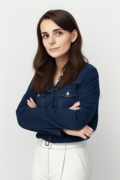
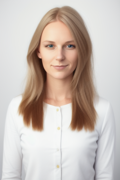
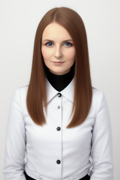
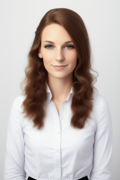
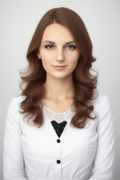
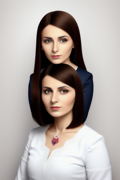
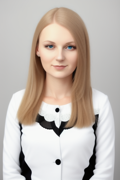
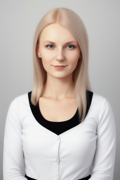
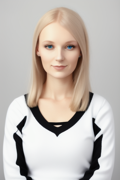
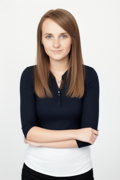
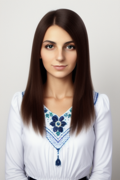
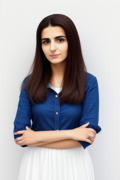
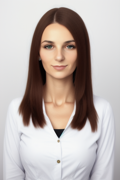
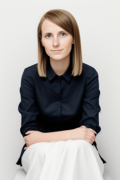
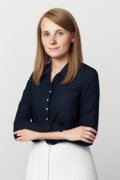
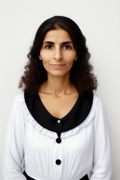
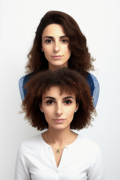
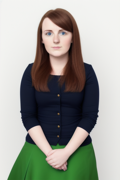
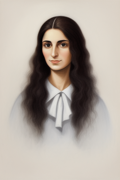
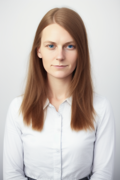
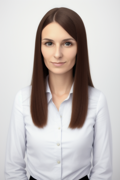
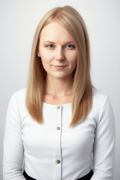
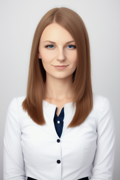

In [11]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 1)
display_euro_map_for_image_dict(image_dict)

# Display several maps

## WOMEN

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



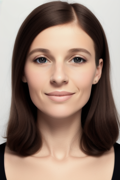
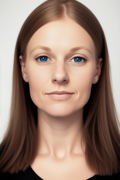
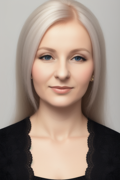
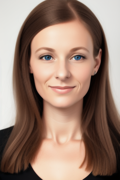
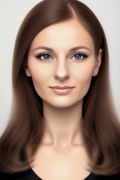
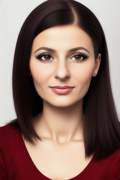
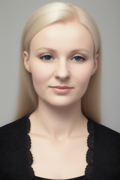
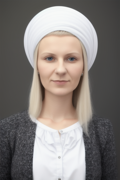
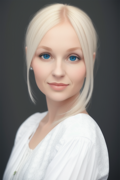
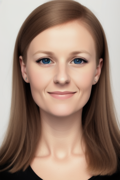
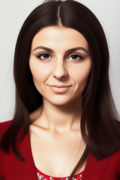
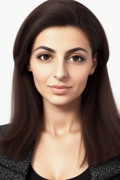
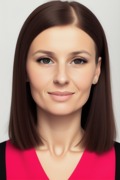
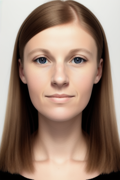
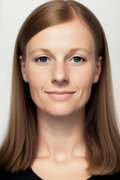
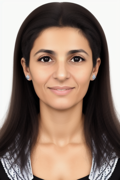
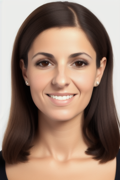
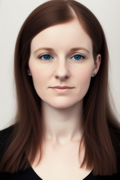
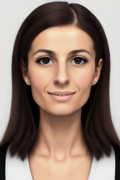
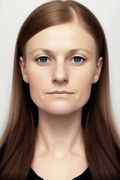
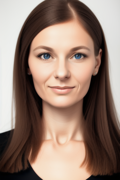
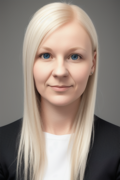
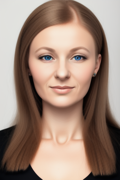

In [12]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 0)
display_euro_map_for_image_dict(image_dict)

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



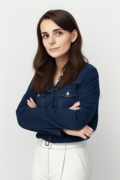
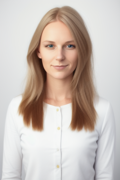
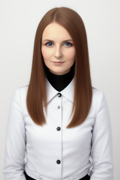
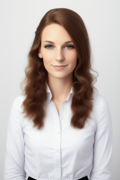
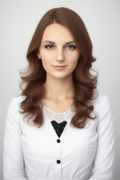
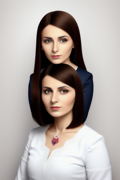
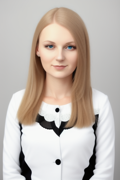
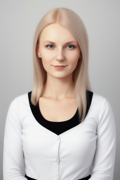
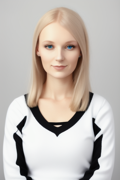
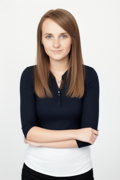
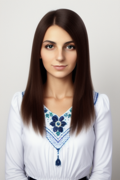
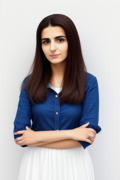
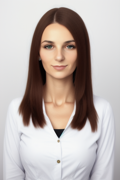
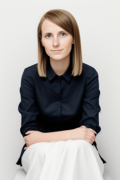
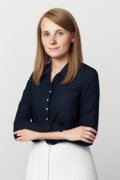
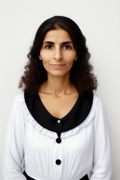
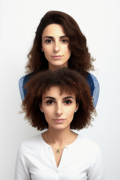
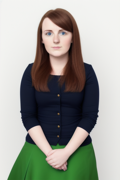
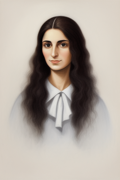
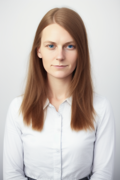
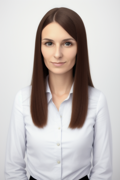
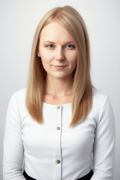
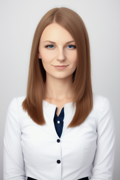

In [13]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 1)
display_euro_map_for_image_dict(image_dict)

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



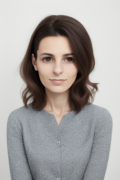
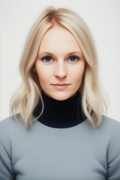
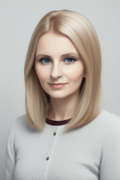
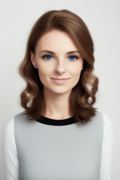
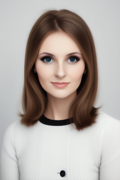
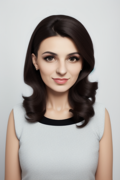
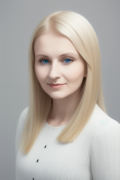
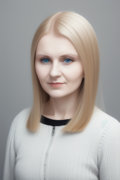
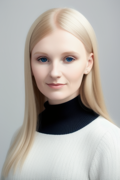
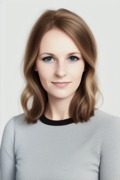
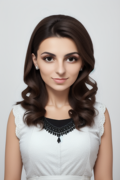
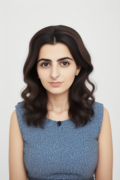
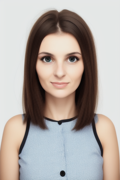
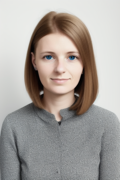
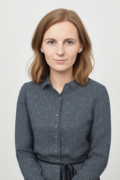
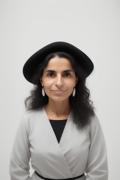
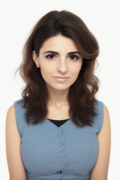
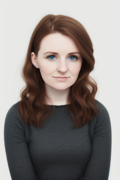
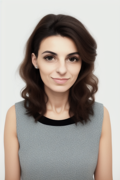
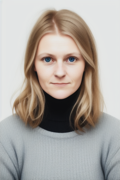
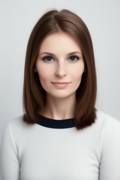
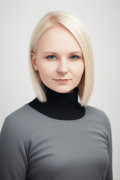
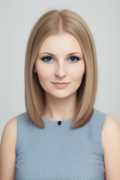

In [14]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 2)
display_euro_map_for_image_dict(image_dict)

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



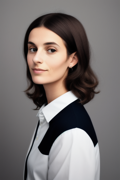
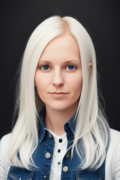
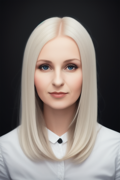
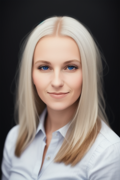
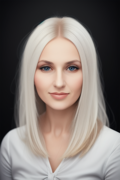
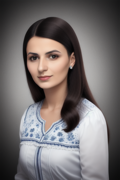
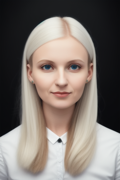
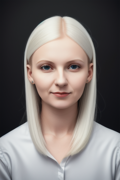
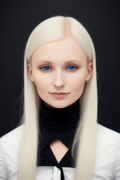
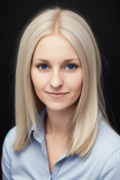
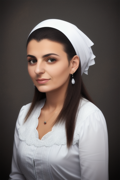
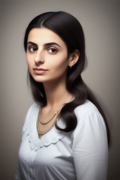
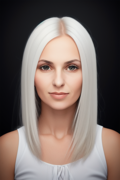
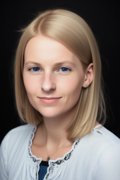
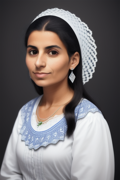
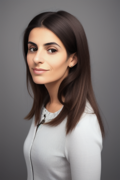
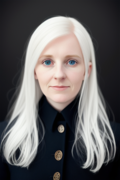
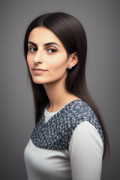
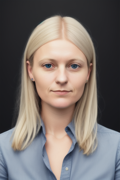
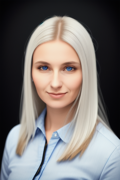
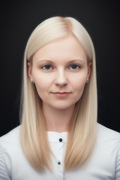
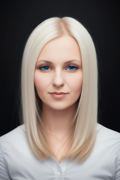

In [15]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 3)
display_euro_map_for_image_dict(image_dict)

## MEN

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



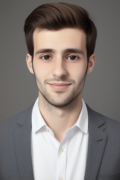
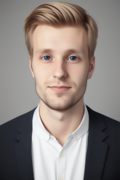
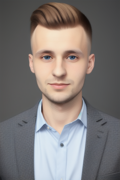
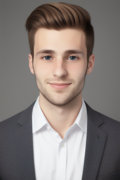
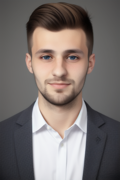
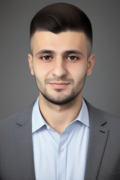
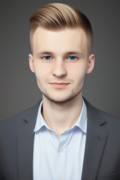
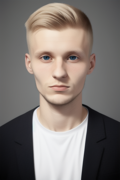
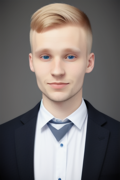
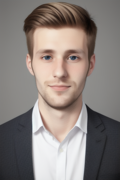
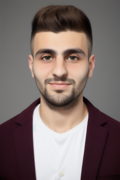
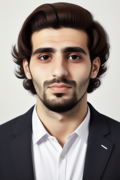
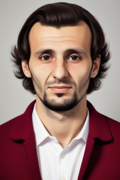
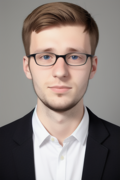
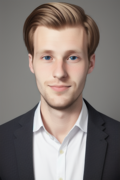
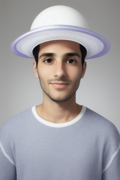
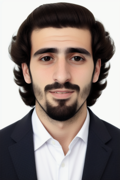
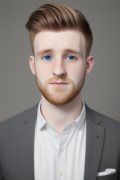
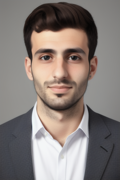
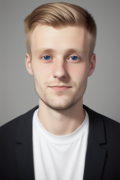
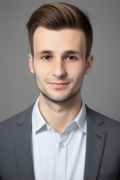
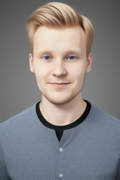
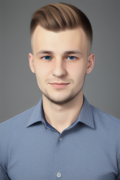

In [16]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 0, "men")
display_euro_map_for_image_dict(image_dict)

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



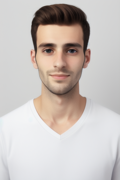
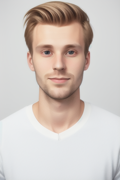
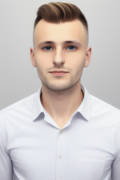
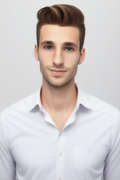
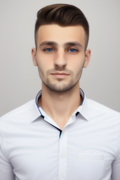
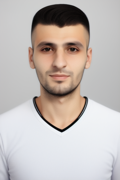
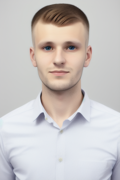
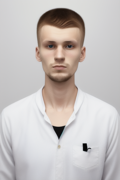
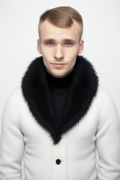
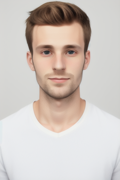
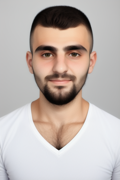
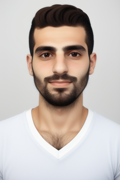
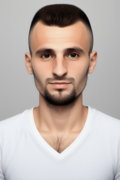
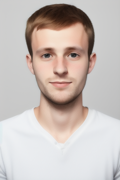
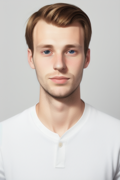
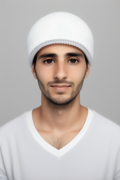
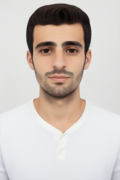
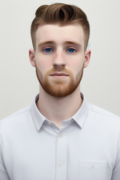
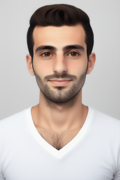
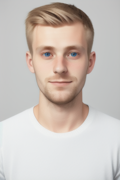
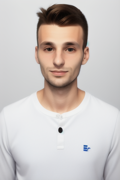
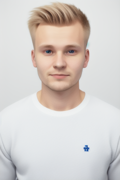
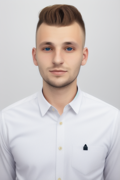

In [17]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 1, "men")
display_euro_map_for_image_dict(image_dict)

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



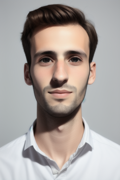
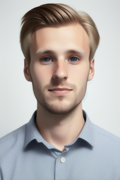
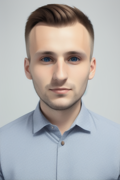
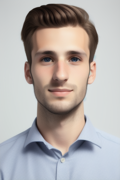
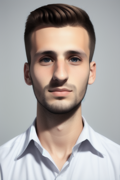
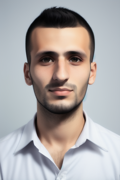
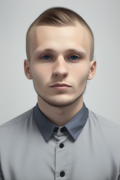
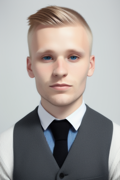
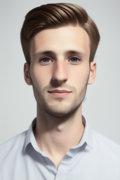
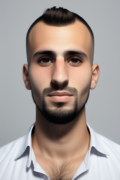
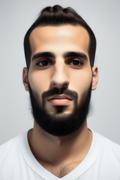
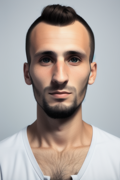
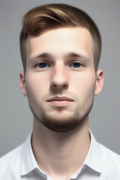
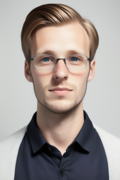
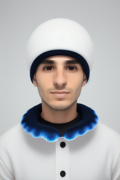
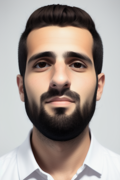
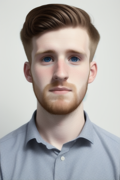
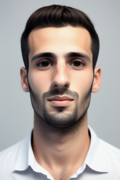
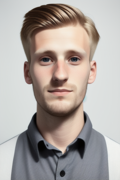
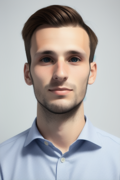
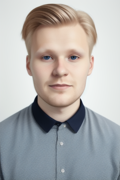
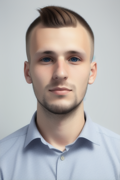

In [18]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 2, "men")
display_euro_map_for_image_dict(image_dict)

<ipython-input-10-15853dc6f0da>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



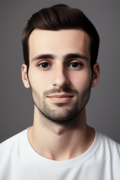
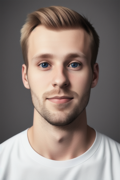
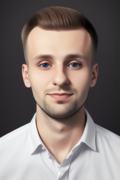
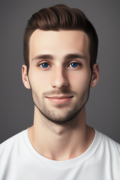
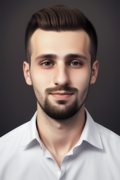
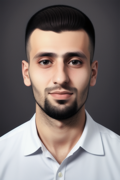
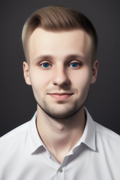
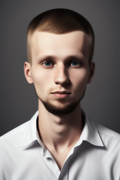
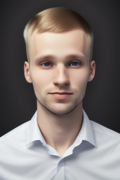
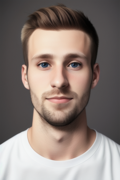
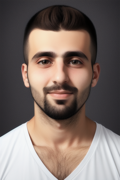
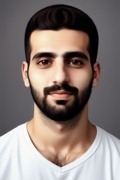
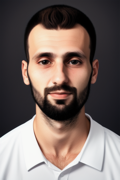
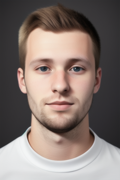
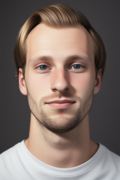
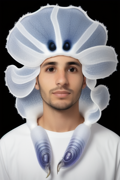
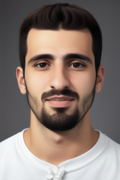
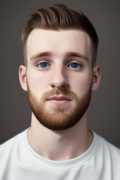
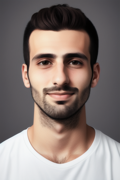
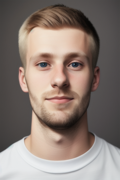
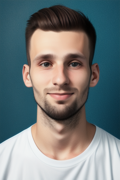
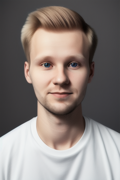
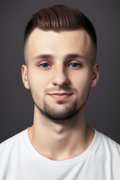

In [19]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 3, "men")
display_euro_map_for_image_dict(image_dict)

# Export data to GeoJSON

In [20]:
import json
import base64
from PIL import Image
from io import BytesIO

def create_geojson(image_dict, geojson_export_name):
    img_zoom = 2
    img_width = 60 * img_zoom
    img_height = 90 * img_zoom

    # GeoJSON object
    geojson = {
        "type": "FeatureCollection",
        "features": []
    }

    # Load world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Filter for Europe
    europe = world[world['continent'] == 'Europe']

    for country in europe.itertuples():
        country_name = country.name
        if country_name in image_dict:
            # Open image, resize and convert to base64
            img = Image.open(image_dict[country_name])
            img = img.resize((img_width, img_height))
            buffered = BytesIO()
            img.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode()

            # Create feature for each country with location and image
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [
                        float(country.geometry.representative_point().x), 
                        float(country.geometry.representative_point().y)
                    ]
                },
                "properties": {
                    "name": country_name,
                    "image": img_str
                }
            }
            geojson["features"].append(feature)

    # Write GeoJSON to file
    with open(f'{geojson_export_name}.geojson', 'w') as f:
        json.dump(geojson, f)


In [21]:
image_dict = change_image_country_to_filename_map(country_to_filename_df, 0, "men")
create_geojson(image_dict, 'europe_men_batch_1')

<ipython-input-20-089a047b4584>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [22]:
for gender in ['man', 'woman']:
  for batch_index in range(4):
    image_dict = change_image_country_to_filename_map(country_to_filename_df, batch_index, gender)
    create_geojson(image_dict, f'europe_{gender}_batch_{batch_index}')

<ipython-input-20-089a047b4584>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-20-089a047b4584>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-20-089a047b4584>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-20-089a